In [8]:
# Load test data

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import scipy.sparse

X = scipy.sparse.load_npz('./data/X_sparse.npz')
y = np.load("./data/y_sparse.npy")

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [37]:
# Naive Bayes Model here is just for dev purposes
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

pipeline = Pipeline([
        ("mnb", MultinomialNB())
    ])

param_grid = {"mnb__alpha": [0, 0.9, 0.11, 0.13, 1]}
CV = GridSearchCV(pipeline, param_grid, cv = 5)
# pipeline.get_params().keys() See all available parameters
CV.fit(X_train, y_train)

/Users/stefanwinter/Local/Thesis/App/.thesis/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/stefanwinter/Local/Thesis/App/.thesis/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/stefanwinter/Local/Thesis/App/.thesis/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/stefanwinter/Local/Thesis/App/.thesis/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/stefanwinter/Local/Thesis/App/.thesis/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warni

GridSearchCV(cv=5, estimator=Pipeline(steps=[('mnb', MultinomialNB())]),
             param_grid={'mnb__alpha': [0, 0.9, 0.11, 0.13, 1]})

In [38]:
CV.best_estimator_

Pipeline(steps=[('mnb', MultinomialNB(alpha=0.11))])

In [1]:
import pickle
nb = pickle.load(open("./data/nb_first_model_mnb.sav", "rb"))

/Users/stefanwinter/Local/Thesis/App/.thesis/lib/python3.9/site-packages/sklearn/base.py:324: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/stefanwinter/Local/Thesis/App/.thesis/lib/python3.9/site-packages/sklearn/base.py:324: UserWarning: Trying to unpickle estimator Pipeline from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/stefanwinter/Local/Thesis/App/.thesis/lib/python3.9/site-packages/sklearn/base.py:324: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.24.

In [39]:
print("Accuracy of {} can be achieved with the following parameters: {}".format(nb.score(X_test, y_test), CV.best_params_))

Accuracy of 0.7632626918042831 can be achieved with the following parameters: {'mnb__alpha': 0.11}


In [45]:
print(CV.cv_results_["mean_test_score"])

[0.77517318 0.76137432 0.78094476 0.78077767 0.75838062]


In [73]:
for i in range(0, len(CV.cv_results_["mean_test_score"])):
    param = CV.param_grid["mnb__alpha"][i]
    score = np.round(CV.cv_results_["mean_test_score"][i], 3)
    print("Alpha: {:<4}  : {} Validation Score".format(param, score))

Alpha: 0     : 0.775 Validation Score
Alpha: 0.9   : 0.761 Validation Score
Alpha: 0.11  : 0.781 Validation Score
Alpha: 0.13  : 0.781 Validation Score
Alpha: 1     : 0.758 Validation Score


In [74]:
y_pred = CV.predict(X_test)

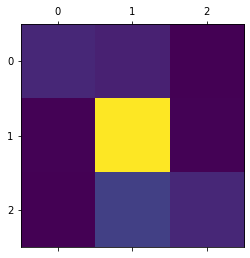

In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report

cf = confusion_matrix(y_test, y_pred)
plt.matshow(cf)
plt.show()

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.52      0.64      5189
           1       0.77      0.97      0.86     23295
           2       0.84      0.36      0.51      7425

    accuracy                           0.78     35909
   macro avg       0.81      0.62      0.67     35909
weighted avg       0.79      0.78      0.75     35909



In [90]:
print(len(y_pred[y_pred == 0]))
print(len(y_pred[y_pred == 1]))
print(len(y_pred[y_pred == 2]))

3291
29394
3224


In [89]:
print(len(y_test[y_test == 0]))
print(len(y_test[y_test == 1]))
print(len(y_test[y_test == 2]))

5189
23295
7425
